In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#dataset
automobile_df = pd.read_csv("../bases/auto-mpg.csv", sep = ",")

# Ver 5 registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
162,15.0,6,258.0,110,3730,19.0,75,1,amc matador
323,27.9,4,156.0,105,2800,14.4,80,1,dodge colt
42,12.0,8,383.0,180,4955,11.5,71,1,dodge monaco (sw)
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom


In [3]:
#shape
automobile_df.shape 

(398, 9)

In [4]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#Preparando os dados
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [6]:
#Eliminamos colunas
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [7]:
#registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
249,19.9,8,260.0,110,3365,15.5,78
351,34.4,4,98.0,65,2045,16.2,81
152,19.0,6,225.0,95,3264,16.0,75
227,19.0,6,225.0,100,3630,17.7,77
263,17.7,6,231.0,165,3445,13.4,78


In [8]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [9]:
#Covertemos o formato de ‘model year’ a ano completo
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [10]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
338,27.2,4,135.0,84,2490,15.7,1981
30,28.0,4,140.0,90,2264,15.5,1971
332,29.8,4,89.0,62,1845,15.3,1980
84,27.0,4,97.0,88,2100,16.5,1972
154,15.0,6,250.0,72,3432,21.0,1975


In [11]:
#Criando a coluna de idade
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [12]:
#Eliminamos model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [13]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
303,31.8,4,85.0,65,2020,19.2,43
37,18.0,6,232.0,100,3288,15.5,51
216,31.5,4,98.0,68,2045,18.5,45
1,15.0,8,350.0,165,3693,11.5,52
252,19.2,6,231.0,105,3535,19.2,44


In [14]:
# Types
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [15]:
#Convertemos a potência em valores numéricos
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [16]:
#Análise de dados estatísticos
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,46.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,43.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,46.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


Text(0, 0.5, 'Milhas por galão')

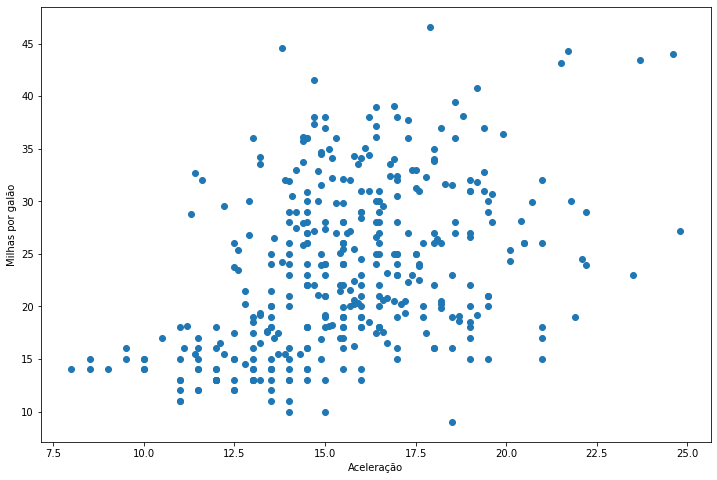

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
# MPG, or miles per gallon
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleração')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

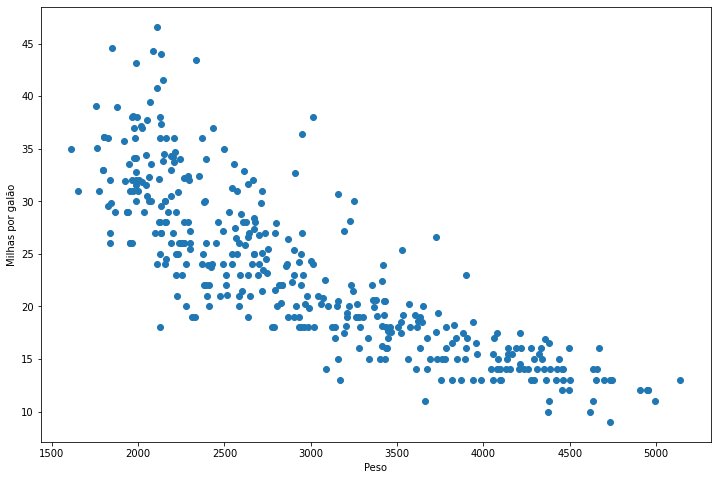

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

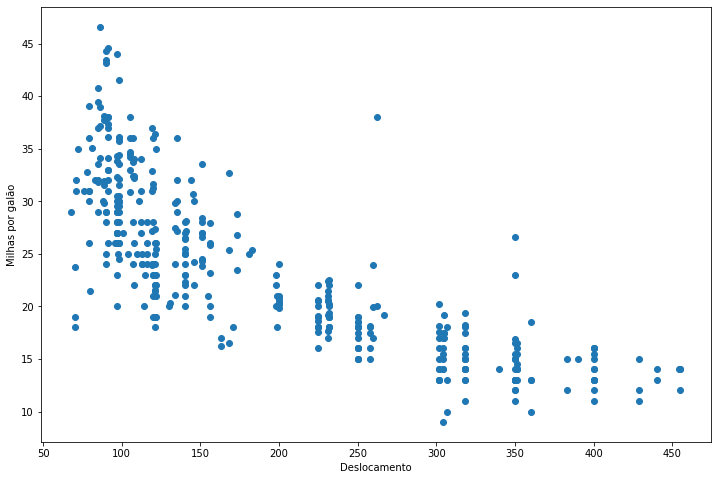

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Deslocamento')
plt.ylabel('Milhas por galão')

Text(0, 0.5, 'Milhas por galão')

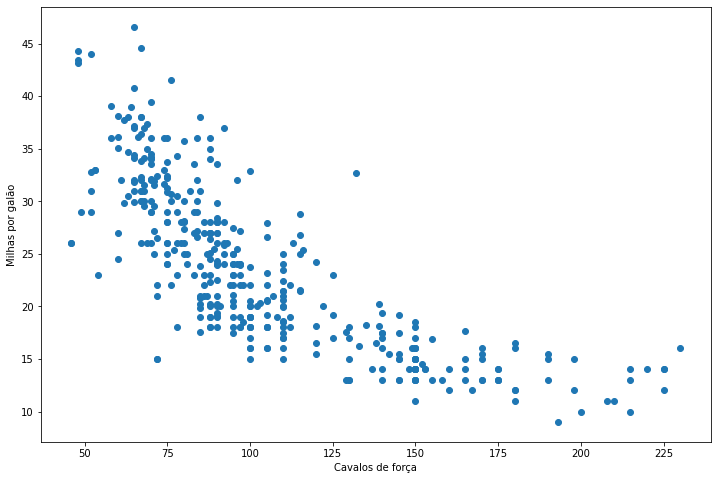

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Cavalos de força')
plt.ylabel('Milhas por galão')

In [22]:
#Correlções
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


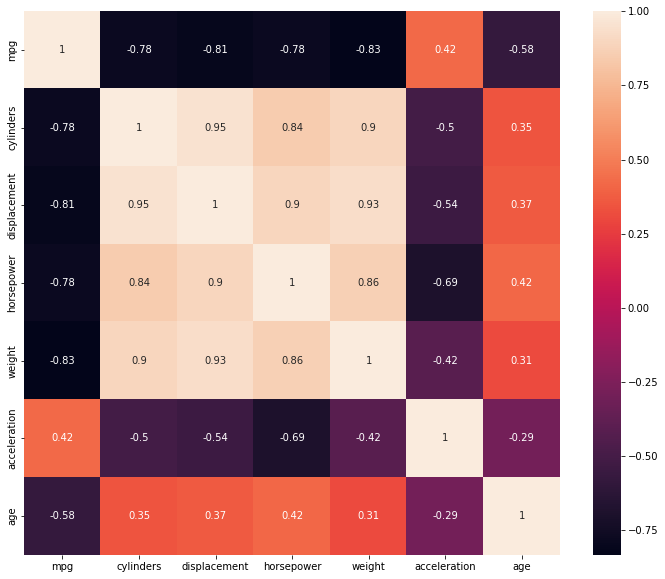

In [23]:
#Matriz de Correlações
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [24]:
#Regresion Linear
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

#Train e Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [26]:
print('Pontuação de treinamento: ', linear_model.score(x_train, y_train))

Pontuação de treinamento:  0.6084351381789946


In [27]:
#Predições
y_pred = linear_model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score

print('Testing: ', r2_score(y_test, y_pred))

Testing:  0.5934964997878047


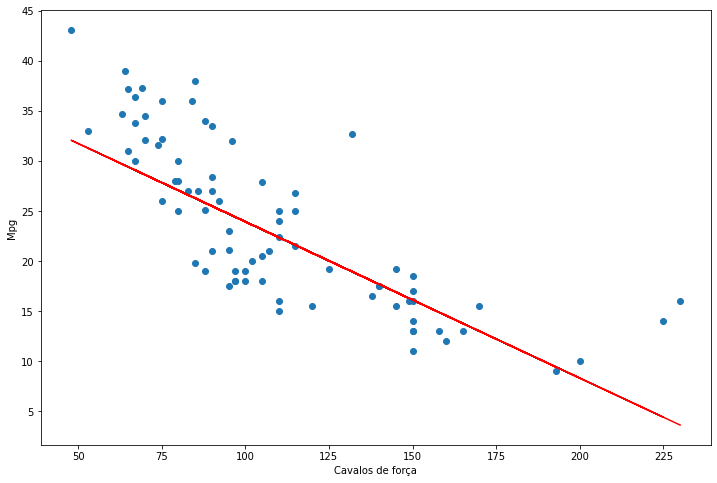

In [30]:
#Plot do ajuste 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Cavalos de força')
plt.ylabel('Mpg')
plt.show()

In [31]:
#Regresion lineal con age
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Pontuação de treinamento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing: ', r2_score(y_test, y_pred))

Pontuação de treinamento:  0.30157171661182913
Testing:  0.42351992369051283


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


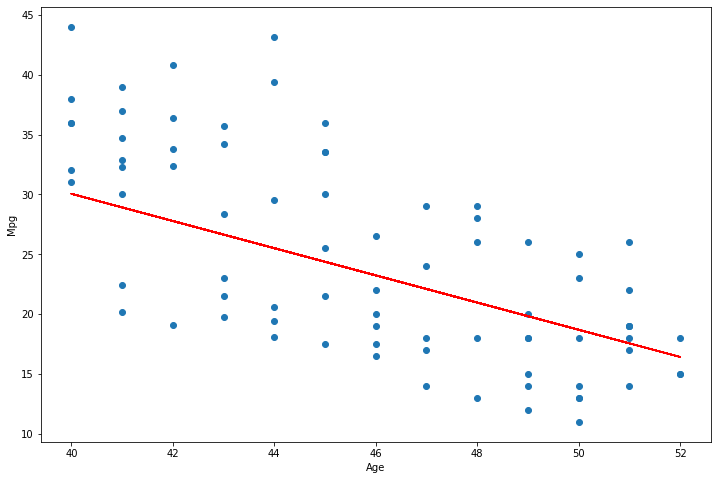

In [32]:
#Plots
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [33]:
#Regressão linear
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
#Modelo
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [35]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6859833691674364


In [36]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.040323
weight         -0.005472
displacement   -0.003707
dtype: float64


In [37]:
#Predições
y_pred = linear_model.predict(x_test)

In [38]:
print('Testing', r2_score(y_test, y_pred))

Testing 0.7750307301620654


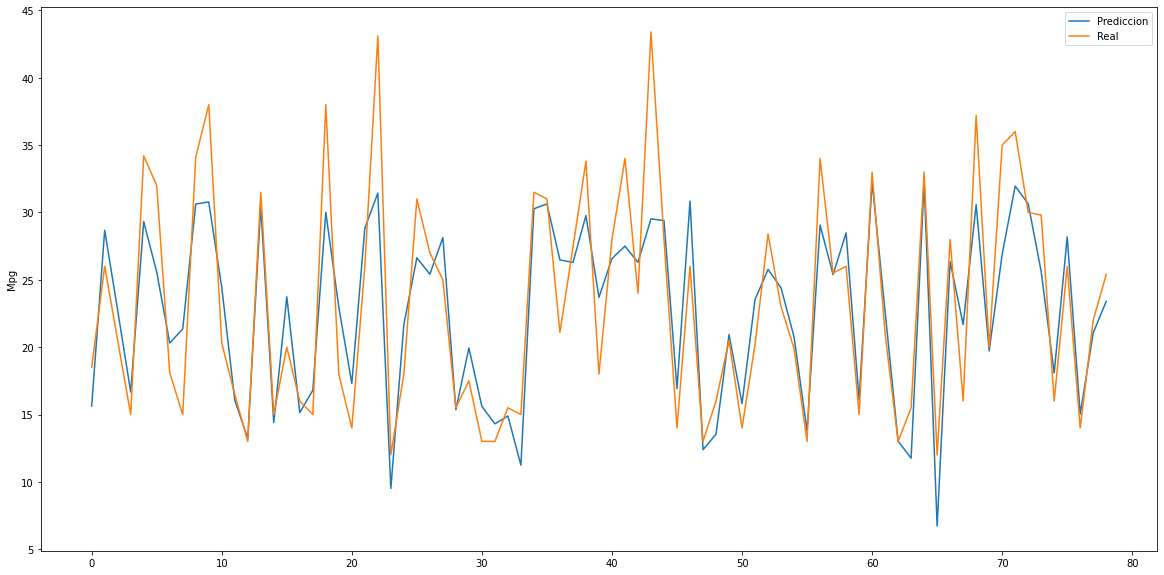

In [39]:
#Plots
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [40]:
#Validação
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.9784901075329495
Mean Squared Error: 15.405894877561943
Root Mean Squared Error: 3.92503437915669
